In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,y_mean_neck_6,z_mean_neck_6,norm_neck_6,x_mean_neck_6.1,y_mean_neck_6.1,z_mean_neck_6.1,norm_neck_6.1,PWR_6,HR_6,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,-0.8,-0.572498,-0.2,0.6,-0.2,-0.365915,2244433,-4.768670,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,-0.8,0.159211,1.8,0.4,-3.2,0.618757,735291,-1.590027,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.6,0.728247,0.4,-0.8,0.2,0.586656,133009,1.775299,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,-0.8,0.754322,-0.6,1.4,1.0,-0.514049,-505995,6.401017,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.2,-0.2,-1.147313,2.0,0.0,-4.6,0.492658,-1499327,4.667405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.6,-0.985788,0.0,0.2,0.0,-0.026774,-43035,2.394874,0
1451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.6,-0.503011,0.2,0.8,-0.6,0.056344,56868,1.189753,0
1452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.2,0.206750,0.2,0.8,-2.6,-0.062897,4766,-5.252456,0
1453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,3.0,-0.504668,3.0,1.8,-12.0,1.533584,119515,0.734209,0


In [5]:
X = data.drop(['label'],axis=1)
y = data['label']

In [6]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.2, shuffle=False , random_state=0)

In [7]:
(X_train_true, X_vali, y_train_true, y_vali) = train_test_split(X_train, y_train, test_size=0.25, shuffle=False, random_state=0)

In [20]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [26]:
params = {
    'n_estimators':[5, 8, 10, 15, 20, 100, 200 , 300, 500, 1000],
    'max_depth':[16, 32, 64, 100, 200],
    'min_samples_leaf':[8,12,16, 24, 48, 96],
    'min_samples_split':[8,16,20, 40, 60, 90]
}

In [27]:
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_true, y_train_true)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

최적의 하이퍼 파라미터 : {'max_depth': 16, 'min_samples_leaf': 48, 'min_samples_split': 8, 'n_estimators': 200}
최적의 예측 정확도 : 0.4008932882665379


In [32]:
estimator = grid_cv.best_estimator_


In [33]:
pred = estimator.predict(X_vali)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_vali,pred)))

예측 정확도:0.3952


In [34]:
pred = grid_cv.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.3024


In [53]:
df_1_test = data.iloc[0:291:, :]
X_test_1 = df_1_test.drop(['label'],axis=1)
y_test_1 = df_1_test['label']
df_1_vali = data.iloc[291:582, :]
X_vali_1 = df_1_vali.drop(['label'],axis=1)
y_vali_1 = df_1_vali['label']
df_1_train = data.iloc[583:, :]
X_train_1 = df_1_train.drop(['label'],axis=1)
y_train_1 = df_1_train['label']

In [54]:
print('X_trainの形状:', X_vali_1.shape, 'y_trainの形状:', y_vali_1.shape, 'X_testの形状:', X_train_1.shape, 'y_testの形状', y_train_1.shape)

X_trainの形状: (291, 112) y_trainの形状: (291,) X_testの形状: (872, 112) y_testの形状 (872,)


In [39]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [40]:
params = {
    'n_estimators':[5, 8, 10, 15, 20, 100, 200 , 300, 500, 1000],
    'max_depth':[16, 32, 64, 100, 200],
    'min_samples_leaf':[8,12,16, 24, 48, 96],
    'min_samples_split':[8,16,20, 40, 60, 90]
}

In [41]:
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_1, y_train_1)

print('最適ハイパーパラメータ :',grid_cv.best_params_)
print('最適精度 :',grid_cv.best_score_)

최적의 하이퍼 파라미터 : {'max_depth': 16, 'min_samples_leaf': 96, 'min_samples_split': 8, 'n_estimators': 20}
최적의 예측 정확도 : 0.3830275229357798


In [90]:
pred = estimator.predict(X_vali)
print('検証精度:{0:.4f}'.format(accuracy_score(y_vali,pred)))

예측 정확도:0.3952


In [91]:
pred = grid_cv.predict(X_test)
print('精度:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.4948


In [94]:
rf1 = RandomForestClassifier(max_depth = 16, min_samples_leaf= 96, min_samples_split= 8, n_estimators= 20, random_state=0, n_jobs=-1)
rf1.fit(X_train, y_train)
pred = rf1.predict(X_test)
print('精度:{0:.4f}'.format(accuracy_score(y_test,pred)))

精度:0.3196


In [67]:
rf1.feature_importances_

array([0.00555267, 0.08883456, 0.10898832, 0.01195915, 0.        ,
       0.01277379, 0.05036174, 0.01211146, 0.02392313, 0.05046811,
       0.        , 0.01534463, 0.09146682, 0.03216259, 0.        ,
       0.        , 0.        , 0.        , 0.01032706, 0.02497207,
       0.00899235, 0.        , 0.00641671, 0.        , 0.        ,
       0.00637679, 0.        , 0.00909287, 0.00701949, 0.00728171,
       0.        , 0.00324679, 0.        , 0.        , 0.01324768,
       0.        , 0.00615891, 0.        , 0.        , 0.00969197,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00700966, 0.        , 0.00677814, 0.        ,
       0.00473918, 0.        , 0.00887331, 0.00685087, 0.01612377,
       0.        , 0.        , 0.        , 0.        , 0.03199158,
       0.01891469, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03758148, 0.02491994, 0.0136614 ,
       0.        , 0.        , 0.        , 0.00279478, 0.     

In [95]:
# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],rf1.feature_importances_[i])

abnormal_x_arm 0.005552668071088287
abnormal_y_arm 0.08883455790268938
abnormal_z_arm 0.10898831711392117
abnormal_norm_arm 0.011959146587016831
abnormal_x_neck 0.0
abnormal_y_neck 0.012773792130578221
abnormal_z_neck 0.050361735176320296
abnormal_norm_neck 0.012111460039203787
abnormal_x_waist 0.023923125985989467
abnormal_y_waist 0.05046810673294984
abnormal_z_waist 0.0
abnormal_norm_waist 0.015344631224243722
abnormal_PWR 0.09146681832819252
abnormal_HR 0.03216258643593107
x_mean_arm 0.0
y_mean_arm 0.0
z_mean_arm 0.0
norm_arm 0.0
x_mean_neck 0.010327057532222721
y_mean_neck 0.024972070274483893
z_mean_neck 0.008992349937654489
norm_neck 0.0
x_mean_neck.1 0.006416711103937663
y_mean_neck.1 0.0
z_mean_neck.1 0.0
norm_neck.1 0.00637678558376549
PWR 0.0
HR 0.009092873730285831
x_mean_arm_1 0.007019490540434698
y_mean_arm_1 0.007281709108904802
z_mean_arm_1 0.0
norm_arm_1 0.0032467931377025555
x_mean_neck_1 0.0
y_mean_neck_1 0.0
z_mean_neck_1 0.01324767615417645
norm_neck_1 0.0
x_mean_ne

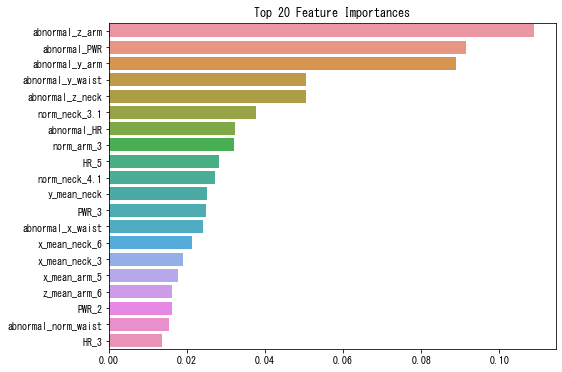

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [87]:
df_1_test = data.iloc[:291, :]
X_test_1 = df_1_test.drop(['label'],axis=1)
y_test_1 = df_1_test['label']
df_1_vali = data.iloc[292:583, :]
X_vali_1 = df_1_vali.drop(['label'],axis=1)
y_vali_1 = df_1_vali['label']
df_1_train = data.iloc[583:, :]
X_train_1 = df_1_train.drop(['label'],axis=1)
y_train_1 = df_1_train['label']
df_1_train_true = data.iloc[292:, :]
X_train_true_1 = df_1_train_true.drop(['label'], axis=1)
y_train_true_1 = df_1_train_true['label']

In [88]:
rf1 = RandomForestClassifier(max_depth = 16, min_samples_leaf= 96, min_samples_split= 8, n_estimators= 20, random_state=0, n_jobs=-1)
rf1.fit(X_train_true_1, y_train_true_1)
pred = rf1.predict(X_test_1)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test_1,pred)))

예측 정확도:0.3780


In [89]:
# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],rf1.feature_importances_[i])
#macの場合違うフォントを指定すると正しく実行されるはず
plt.rcParams['font.family'] = "MS Gothic"
s = pd.Series(rf.feature_importances_, index=X.columns)
sort_s = s.sort_values(ascending=False)
sort_s.plot.bar()
plt.show()

abnormal_x_arm 0.012835739582424167
abnormal_y_arm 0.08264017930693408
abnormal_z_arm 0.07623069664167312
abnormal_norm_arm 0.017824124173964076
abnormal_x_neck 0.051872901794956884
abnormal_y_neck 0.0
abnormal_z_neck 0.01947756159493716
abnormal_norm_neck 0.010193988601839257
abnormal_x_waist 0.008911838794720156
abnormal_y_waist 0.03993417724078009
abnormal_z_waist 0.006448155343240887
abnormal_norm_waist 0.009636313189167823
abnormal_PWR 0.06209987624672343
abnormal_HR 0.0258164360620425
x_mean_arm 0.0
y_mean_arm 0.00957875295669102
z_mean_arm 0.0
norm_arm 0.010998219026416562
x_mean_neck 0.009229794195744634
y_mean_neck 0.0
z_mean_neck 0.0026541366721876216
norm_neck 0.0
x_mean_neck.1 0.006818706789956537
y_mean_neck.1 0.021630192592911306
z_mean_neck.1 0.0
norm_neck.1 0.004423325452864371
PWR 0.0
HR 0.01410780989799397
x_mean_arm_1 0.004904376991987793
y_mean_arm_1 0.0
z_mean_arm_1 0.0
norm_arm_1 0.0
x_mean_neck_1 0.0
y_mean_neck_1 0.0
z_mean_neck_1 0.0
norm_neck_1 0.0
x_mean_neck

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.